<h1 align="center">Volume 4: River Crossing.</h1>

    Spencer Halverson
    MATH 439
    2022-02-24

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import barycentric_interpolate
from scipy.optimize import root

# Problem 1
Assume that the current is given by $c(x) = −
\frac{7}{10} (x^2 − 1)$. (This function assumes, for example, that the current is faster near the center of the river.) Write a Python
function that accepts as arguments a function $y$, its derivative $y'$, and an $x$-value, and returns $L(x, y(x), y'(x))$ (where $T[y]=\int^1_{-1} L(x,y(x),y'(x))dx$ Use that function to defune a second
function that numerically computes $T[y]$ for a given path $y(x)$.

In [82]:
# current of river
c = np.vectorize(lambda x: -7./10*(x**2 - 1))


def L(x, y, y_prime): # defined in (7.3)
    alpha = (1-c(x)**2)**(-1./2)
    return alpha * np.sqrt(1+(alpha*y_prime(x))**2) - (alpha**2)*(c(x))*y_prime(x)

def T(y, y_prime):
    return quad(L, -1, 1, args=(y, y_prime,))[0]


# Problem 2

Let y(x) be the straight-line path between A = (−1, 0) and B = (1, 5). Numerically calculate T[y] to get an upper bound on the minimum time required to cross from A to
B. Using (18.2), find a lower bound on the minimum time required to cross.

In [83]:
y = np.vectorize(lambda x: (5/2)*(x+1))
y_prime = np.vectorize(lambda x: 5./2)

print("Upper bound:", T(y, y_prime))
print("Since the minimum of secant (in our range of angles) is 1,")
print("the minimum time it could take is 2 time units (lower bound).")

Upper bound: 3.8770820491384126
Since the minimum of secant (in our range of angles) is 1,
the minimum time it could take is 2 time units (lower bound).


# Problem 3

Numerically solve the Euler-Lagrange equation (18.4), using c(x) = −
7
10 (x
2 − 1)
and α = (1 − c
2
)
−1/2
, and y(−1) = 0, y(1) = 5.
Hint: Since this boundary value problem is defined over the doimain [−1, 1], it is easy to
solve using the pseudospectral method. Begin by replacing each d
dx with the pseudospectral
differentiation matrix D. Then impose the boundary conditions and solve.

In [84]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

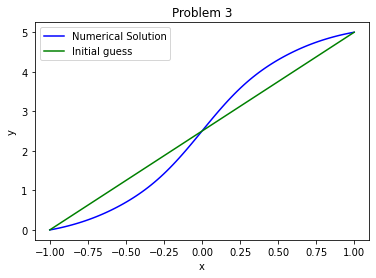

In [103]:
# Much of this code taken from Spectral 1 lab (problem 2)
N = 14
alpha = np.vectorize(lambda x: (1-c(x)**2)**(-1./2))

#The following code will force U[0] = U[N] = 0
D, x = cheb(N) #for some N

end = 5
start = 0

# get initial conditions for root finding
alpha_x = alpha(x)
c_x = c(x)
y0 = y(x)

def F(y_vals):
    """y is a vector of y-values. We will find the roots of F 
    so that if F(y0) = 0, then y0 is a numerical approximation of y_true."""
    yp = D@y_vals
    EL = (alpha_x**3)*yp*((1+(alpha_x*yp)**2)**(-1./2)) - (alpha_x**2)*c_x
    EL = D@EL
    EL[0] = y_vals[0] - end
    EL[-1] = y_vals[-1] - start
    return EL

approx_pts = root(F, y0).x
pts = np.linspace(-1, 1, 100)
approx = barycentric_interpolate(x, approx_pts, pts)

# print(approx)
plt.plot(pts, approx, 'b', label="Numerical Solution")
plt.plot(pts, y(pts), 'g', label="Initial guess")
plt.legend(loc='best')
plt.ylabel("y")
plt.xlabel("x")
plt.title("Problem 3")
plt.show()

# Problem 4

Plot the angle at which the boat should be pointed at each $x$-coordinate. (Hint: use Equation 1.1; see Figure 1.3. Note that the angle the boat should be steered is NOT described by the tangent vector to the trjaectory)

In [105]:
D, x = cheb(N) #for some N
yp = D@approx_pts
c_x = c(x)
thetas0 = np.ones_like(x)*0.5

def Q(thetas):
    return 1/np.cos(thetas)*c_x + np.tan(thetas) - yp


approx_pts2 = root(Q, thetas0).x
pts = np.linspace(-1, 1, 100)
approx2 = barycentric_interpolate(x, approx_pts2, pts)

# print(approx)
plt.plot(pts, approx2, 'b')
# plt.plot(x, thetas0, 'g', label="Initial guess")
plt.ylabel("theta")
plt.xlabel("x")
plt.title("Problem 4")
plt.show()